In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.cm import Set2
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import joblib
from tkinter import *
from tkinter import messagebox

# Importing CSV To Python

In [90]:
df = pd.read_csv('Diabetes.csv')
data = df.copy()
print("Number Of Row:",data.shape[0],'Rows')
print("Number Of Column:", data.shape[1], 'Columns')
df.head(10)

Number Of Row: 1536 Rows
Number Of Column: 9 Columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Check For Missing Value

In [91]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Check Data Types 

In [92]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Check Heat Map

<Axes: >

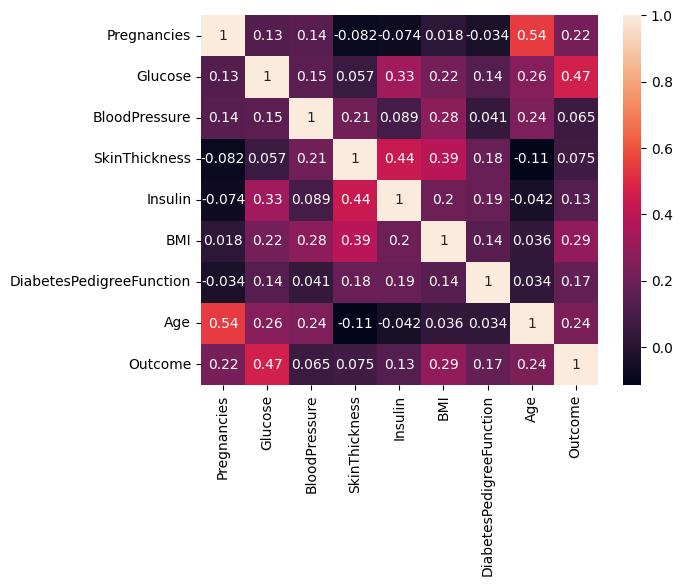

In [93]:
sns.heatmap(df.corr(), annot=True)

# Overall Statistics About The Dataset

In [94]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.368480,31.962202,19.349501,15.947021,115.206457,7.881592,0.331221,11.756400,0.476796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Dealing With Data With Zero Values Data

In [95]:
data_copy = data.copy(deep=True)

In [96]:
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                      10
BloodPressure                70
SkinThickness               454
Insulin                     748
BMI                          22
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [97]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Standarisasi

In [98]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
column_names = X.columns.tolist()
index_values = X.index.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=column_names, index=index_values)
print(X_scaled_df.head(20))


    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      0.639947  0.865276      -0.021044       0.872057 -0.417768  0.167255   
1     -0.844885 -1.205989      -0.516583       0.248678 -0.417768 -0.851535   
2      1.233880  2.015979      -0.681762      -0.630654 -0.417768 -1.331821   
3     -0.844885 -1.074480      -0.516583      -0.374700 -0.265107 -0.633222   
4     -1.141852  0.503626      -2.663916       0.872057  0.530423  1.549899   
5      0.342981 -0.186795       0.144135      -0.630654 -0.417768 -0.997076   
6     -0.250952 -1.436130      -1.838019       0.560368 -0.329609 -0.211152   
7      1.827813 -0.219673      -0.260103      -0.630654 -0.417768  0.414676   
8     -0.547919  2.476260      -0.186224       1.911021  4.561826 -0.283923   
9      1.233880  0.109100       1.961109      -0.630654 -0.417768 -0.066691   
10     0.046014 -0.384059       1.630750      -0.630654 -0.417768  0.749421   
11     1.827813  1.522820       0.144135      -0.630

# Data Splitting

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Training & Evaluation Model (Clasification)
The Model That We Use : 
1. Logistic Regression
2. KNN
3. SVC
4. Desicion Tree
5. Random Forest
6. Gradient Boosting 
7. Naive Bayes



In [100]:
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression())])
pipeline_knn = Pipeline([('scalar2',StandardScaler()),('knn_classifier',KNeighborsClassifier())])
pipeline_svc = Pipeline([('scalar3',StandardScaler()),('svc_classifier',SVC())])
pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])
pipeline_nb = Pipeline([('nb_classifier',GaussianNB())])
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc,
            pipeline_nb]

for pipe in pipelines:
    pipe.fit(X_train,y_train)

pipe_dict = {0:'LR', 1:'KNN', 2:'SVC', 3:'DT', 4: 'RF', 5: 'GBC', 6: 'NB'}

test_accuracies = []
for i, model in enumerate(pipelines):
    accuracy = model.score(X_test, y_test) * 100
    test_accuracies.append(accuracy)
    print("{} Test Accuracy: {:.2f}".format(pipe_dict[i], accuracy), '%')

LR Test Accuracy: 76.30 %
KNN Test Accuracy: 80.52 %
SVC Test Accuracy: 78.25 %
DT Test Accuracy: 92.21 %
RF Test Accuracy: 76.30 %
GBC Test Accuracy: 83.77 %
NB Test Accuracy: 73.05 %


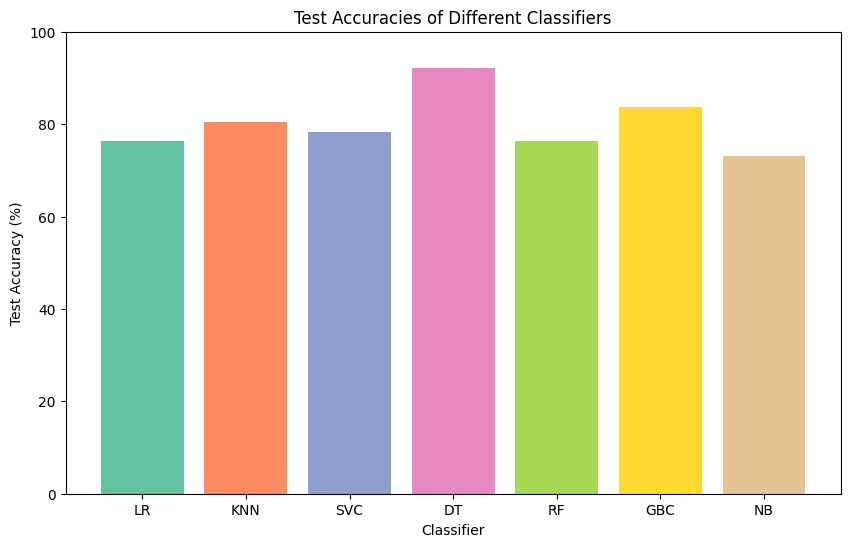

In [101]:
colors = Set2.colors

plt.figure(figsize=(10, 6))
plt.bar(pipe_dict.values(), test_accuracies, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracies of Different Classifiers')
plt.ylim(0, 100)  
plt.show()

We Can See That Decision Tree (DT) is Best Model That We Can Use For This Case

# Try The Model To Test The Data

In [102]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

p = dt.predict(new_data)

if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic


# Saving The Model 

In [103]:
joblib.dump(dt,'Diabetes_model')
model = joblib.load('Diabetes_model')
model.predict(new_data)

array([1], dtype=int64)

# GUI

In [104]:
def show_entry():
    try:
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())
        p8 = float(e8.get())

        print("Input Values:")
        print("Pregnancies:", p1)
        print("Glucose:", p2)
        print("Blood Pressure:", p3)
        print("Skin Thickness:", p4)
        print("Insulin:", p5)
        print("BMI:", p6)
        print("Diabetes Pedigree Function:", p7)
        print("Age:", p8)


        model = joblib.load('Diabetes_model') 
        print("Model Loaded Successfully")
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8]])

        if result == 1:
            result_label.config(text="You Most Likely Have Diabetes !!", fg="Red", anchor="e")
        else:
            result_label.config(text="You Are Free From Diabetes !!", fg="green", anchor="e")
    except ValueError as e:
        print("ValueError:", e)
        messagebox.showerror("Error", "Please enter valid numeric values.")
    except Exception as ex:
        print("Error:", ex)
        messagebox.showerror("Error", "An error occurred while predicting. Please try again.")

master = Tk()
master.title("Diabetes Prediction System")

master.configure(bg="#fdf5e6")
master.geometry("400x300")

header_label = Label(master, text="Diabetes Prediction", font=("Arial", 16), bg="#fdf5e6", fg="#333", anchor="e")
header_label.grid(row=0, columnspan=2, pady=10, sticky="e")

input_frame = Frame(master, bg="#fdf5e6")
input_frame.grid(row=1, columnspan=2, pady=10, sticky="e")

Label(input_frame, text="Pregnancies:", bg="#fdf5e6", anchor="e").grid(row=0, column=0, padx=5, sticky="e")
Label(input_frame, text="Glucose:", bg="#fdf5e6", anchor="e").grid(row=1, column=0, padx=5, sticky="e")
Label(input_frame, text="Blood Pressure:", bg="#fdf5e6", anchor="e").grid(row=2, column=0, padx=5, sticky="e")
Label(input_frame, text="Skin Thickness:", bg="#fdf5e6", anchor="e").grid(row=3, column=0, padx=5, sticky="e")
Label(input_frame, text="Insulin:", bg="#fdf5e6", anchor="e").grid(row=4, column=0, padx=5, sticky="e")
Label(input_frame, text="BMI:", bg="#fdf5e6", anchor="e").grid(row=5, column=0, padx=5, sticky="e")
Label(input_frame, text="Diabetes Pedigree Function:", bg="#fdf5e6", anchor="e").grid(row=6, column=0, padx=5, sticky="e")
Label(input_frame, text="Age:", bg="#fdf5e6", anchor="e").grid(row=7, column=0, padx=5, sticky="e")

e1 = Entry(input_frame)
e2 = Entry(input_frame)
e3 = Entry(input_frame)
e4 = Entry(input_frame)
e5 = Entry(input_frame)
e6 = Entry(input_frame)
e7 = Entry(input_frame)
e8 = Entry(input_frame)

e1.grid(row=0, column=1, padx=5, sticky="e")
e2.grid(row=1, column=1, padx=5, sticky="e")
e3.grid(row=2, column=1, padx=5, sticky="e")
e4.grid(row=3, column=1, padx=5, sticky="e")
e5.grid(row=4, column=1, padx=5, sticky="e")
e6.grid(row=5, column=1, padx=5, sticky="e")
e7.grid(row=6, column=1, padx=5, sticky="e")
e8.grid(row=7, column=1, padx=5, sticky="e")

predict_button = Button(master, text="Predict", command=show_entry, bg="#4CAF50", fg="white", font=("Arial", 12))
predict_button.grid(row=2, column=0, columnspan=2, pady=10, sticky="n")

result_label = Label(master, text="", font=("Arial", 14), bg="#fdf5e6", anchor="e")
result_label.grid(row=3, columnspan=2, sticky="e")

master.mainloop()
